In [26]:
# Importing The Necessary Librarires for the Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Loading the Dataset using the read_csv function
storedealincv = pd.read_csv('amazon.csv', encoding='latin1')

print(storedealincv.describe())

#Providing a short summary of all the coloums in the dataset
print(storedealincv.info())
print("\n")
print("\n\n");
# Displaying the first 5 rows of the dataset    
print("First 5 rows of the dataset:")

print(storedealincv.head())



        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B08WRWPM22  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...           â¹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top          â¹999                 50%    4.1        

In [27]:
#Identify and remove exact/partial duplicate rows
Duplicatestored = storedealincv.duplicated().sum()
print("Number of duplicated rows: ",Duplicatestored )
print("The Duplicated Rows are: \n", storedealincv[storedealincv.duplicated()])
print("\n")
datacleannotduplicate = storedealincv.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", datacleannotduplicate.head().to_string())
print("\n")


PartialCopyRowSum = storedealincv.duplicated(subset= storedealincv.columns.difference(['Index']) , keep="first").sum()
print("The No People Database Partial Duplicates Rows are: ", PartialCopyRowSum)
print("\n")

StoreNodupecol = storedealincv.drop_duplicates(subset = storedealincv.columns.difference(['Index']) , keep = 'first')
print(StoreNodupecol.head().to_string())

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link]
Index: []


The Database Without the Duplicaed Rows Here 
     product_id                                                                                                                                                                                             product_name                                                                           category discounted_price actual_price discount_percentage rating rating_count                                                                                                                                                                                                                                                                                       

In [28]:
print("Missing Values in each Column: \n", StoreNodupecol.isnull().sum())
print("\n")
print("Percentage of Missing Values in each Column: \n", (StoreNodupecol.isnull().mean()*100))

misscolsofstores = pd.DataFrame({
    'Missing_Values_Coloums': StoreNodupecol.isnull().any(),
    'Missing_Values_Count': StoreNodupecol.isnull().sum(),
    'Missing_ValuesIn_Percentage': (StoreNodupecol.isnull().sum() / len(StoreNodupecol)) * 100
})

print(misscolsofstores.to_string())

Missing Values in each Column: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Percentage of Missing Values in each Column: 
 product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.000000
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.

In [29]:
def MissedValueFiller(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with Mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database
filledDatasetstore = MissedValueFiller(StoreNodupecol)
print("The Database After Imputation of Missing Values is : \n", filledDatasetstore.head().to_string())

Filled NaN in categorical column 'product_id' with Mode = B01GGKYKQM
Filled NaN in categorical column 'product_name' with Mode = Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution
Filled NaN in categorical column 'category' with Mode = Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Filled NaN in categorical column 'discounted_price' with Mode = â¹199
Filled NaN in categorical column 'actual_price' with Mode = â¹999
Filled NaN in categorical column 'discount_percentage' with Mode = 50%
Filled NaN in categorical column 'rating' with Mode = 4.1
Filled NaN in categorical column 'rating_count' with Mode = 9,378
Filled NaN in categorical column 'about_product' with Mode = [CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATERIAL]- TPE + Nylon Material to make sure that the life of the cable is enhanced significa

In [30]:
def cleainigSpecialsym(x):
    if isinstance(x, str):
        x = x.replace('â¹', '').replace('₹','').replace(',','').strip()
    try:
        return float(x)
    except:
        return np.nan

filledDatasetstore['discounted_price'] = filledDatasetstore['discounted_price'].apply(cleainigSpecialsym)
filledDatasetstore['actual_price'] = filledDatasetstore['actual_price'].apply(cleainigSpecialsym)

# Clean rating_count column
filledDatasetstore['rating_count'] = filledDatasetstore['rating_count'].str.replace(',', '').astype(float)

# Convert rating column to numeric
filledDatasetstore['rating'] = pd.to_numeric(filledDatasetstore['rating'], errors='coerce')

print("\n The Database After Cleaning Special Symbols is : \n", filledDatasetstore.head().to_string())


 The Database After Cleaning Special Symbols is : 
    product_id                                                                                                                                                                                             product_name                                                                           category  discounted_price  actual_price discount_percentage  rating  rating_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Data cleaned successfully.


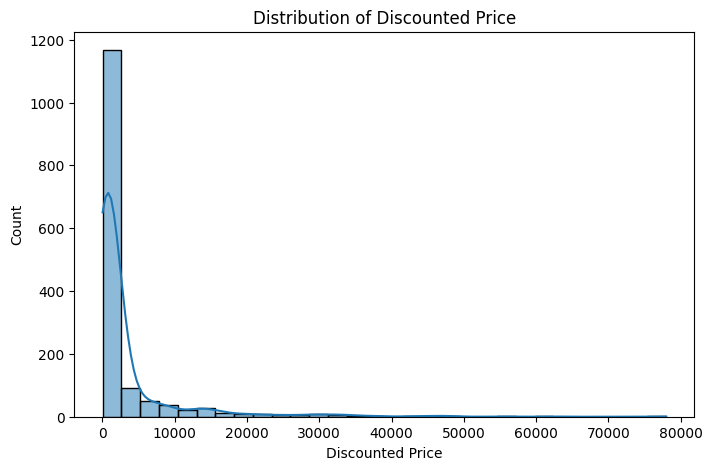

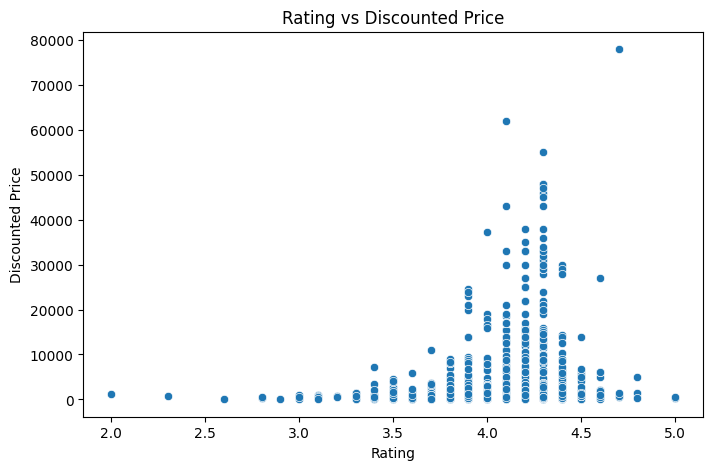

C:\Users\Vijay Pranav\AppData\Local\Temp\ipykernel_31072\4231503981.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


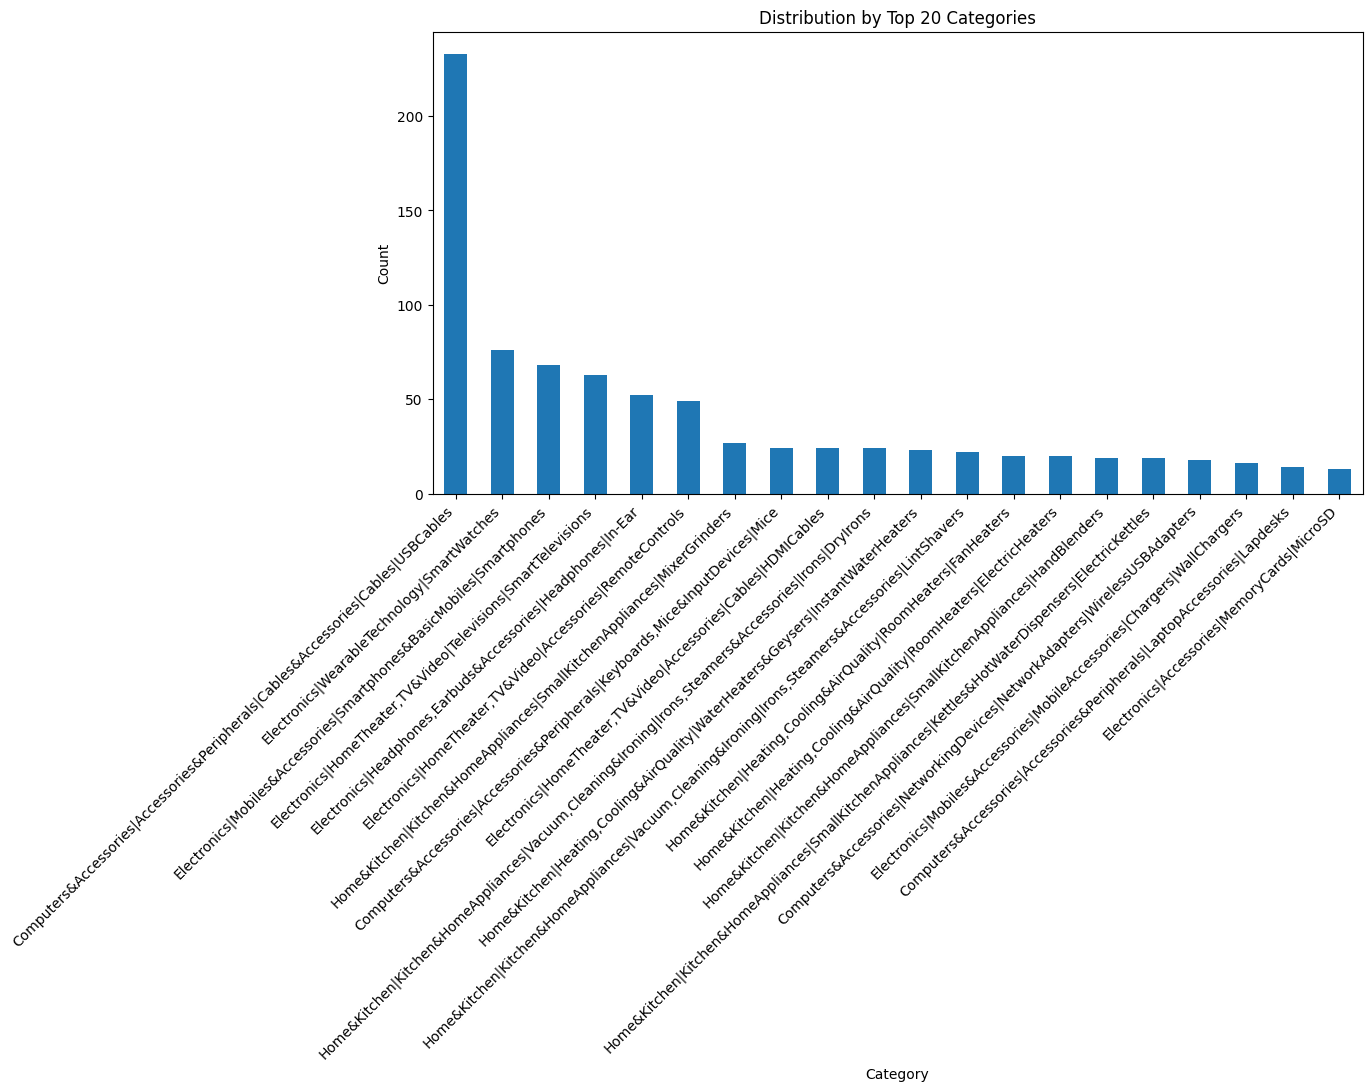

The Cleaned DataFrame is: 
    product_id                                                                                                                                                                                             product_name                                                                           category  discounted_price  actual_price discount_percentage  rating  rating_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [31]:

class ProductDataAnalysis:
    def __init__(self, dataframe):
    
         self.copiedDataset = dataframe.copy()  

    def clean_data(self):
        self.copiedDataset['discounted_price'] = self.copiedDataset['discounted_price'].apply(cleainigSpecialsym)
        self.copiedDataset['actual_price'] = self.copiedDataset['actual_price'].apply(cleainigSpecialsym)


        if self.copiedDataset['rating_count'].dtype == 'object':
            self.copiedDataset['rating_count'] = (
                self.copiedDataset['rating_count']
                .str.replace(',', '', regex=False)
                .astype(float)
            )

        self.copiedDataset['rating'] = pd.to_numeric(self.copiedDataset['rating'], errors='coerce')
        self.copiedDataset.drop_duplicates(inplace=True)

        NumericChanged = self.copiedDataset.select_dtypes(include=[np.number]).columns
        for col in NumericChanged:
            self.copiedDataset[col] = self.copiedDataset[col].fillna(self.copiedDataset[col].median())
    
        ObjChed = self.copiedDataset.select_dtypes(include=['object']).columns
        for col in ObjChed:
            self.copiedDataset[col] = self.copiedDataset[col].fillna('Unknown')

    print("Data cleaned successfully.")

    
    def DiscountePriced(self):
        plt.figure(figsize=(8,5))
        sns.histplot(self.copiedDataset['discounted_price'], bins=30, kde=True)
        plt.title('Distribution of Discounted Price')
        plt.xlabel('Discounted Price')
        plt.ylabel('Count')
        plt.show()
    
    def RatingandDiscountedPrice(self):
     
        plt.figure(figsize=(8,5))
        sns.scatterplot(x='rating', y='discounted_price', data=self.copiedDataset)
        plt.title('Rating vs Discounted Price')
        plt.xlabel('Rating')
        plt.ylabel('Discounted Price')
        plt.show()
    
    def CatDistrubutionFunc(self, top_n=20):
        plt.figure(figsize=(12,6))
        self.copiedDataset['category'].value_counts().head(top_n).plot(kind='bar')
        plt.title(f'Distribution by Top {top_n} Categories')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  
        plt.tight_layout()
        plt.show()


    def get_data(self):
        return self.copiedDataset



analysis = ProductDataAnalysis(filledDatasetstore)
analysis.clean_data()
analysis.DiscountePriced()
analysis.RatingandDiscountedPrice()
analysis.CatDistrubutionFunc(top_n=20)
cleaned_df = analysis.get_data()
print("The Cleaned DataFrame is: \n", cleaned_df.head().to_string())


In [32]:
X = filledDatasetstore[['actual_price', 'rating']].copy()
y = filledDatasetstore['discounted_price']

X = X.fillna(0)
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Model Coefficients: [0.6125516  8.13539596]
Intercept: -266.89362250150134
R^2 Score: 0.9186022549321584
RMSE: 2028.9976960431795
